# Predicting Housing Prices

In [1]:
import pandas as pd

In [2]:
housing_price_index=pd.read_csv('data/code_data/data/house/monthly-hpi.csv')
unemployment = pd.read_csv('data/code_data/data/house/unemployment-macro.csv')
federal_funds_rate = pd.read_csv('data/code_data/data/house/fed_funds.csv')
shiller = pd.read_csv('data/code_data/data/house/shiller.csv')
gross_domestic_product = pd.read_csv('data/code_data/data/house/gdp.csv')

In [3]:
housing_price_index.head()

,date,housing_price_index
0,2010-11-01,186.07
1,2010-12-01,183.27
2,2011-01-01,181.35
3,2011-02-01,179.66
4,2011-03-01,178.84


In [4]:
unemployment.head()

,date,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers
0,2010-11-01,16.9,8696,2531,6708,5.7,63.0
1,2010-12-01,16.6,8549,2609,6899,6.4,61.2
2,2011-01-01,16.2,8393,2800,6816,6.5,60.1
3,2011-02-01,16.0,8175,2730,6741,6.4,60.2
4,2011-03-01,15.9,8166,2434,6735,6.4,60.3


In [5]:
federal_funds_rate.head()

,date,federal_funds_rate
0,2010-11-01,0.19
1,2010-12-01,0.18
2,2011-01-01,0.17
3,2011-02-01,0.16
4,2011-03-01,0.14


In [6]:
shiller.head()

,date,sp500,consumer_price_index,long_interest_rate
0,2010-11-01,1198.89,218.80,2.76
1,2010-12-01,1241.53,219.18,3.29
2,2011-01-01,1282.62,220.22,3.39
3,2011-02-01,1321.12,221.31,3.58
4,2011-03-01,1304.49,223.47,3.41


In [7]:
gross_domestic_product.head()

,date,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,5766.7,64.2,192.7,14881.3
1,2011-04-01,5870.8,64.2,203.1,14989.6
2,2011-07-01,5802.6,64.0,204.6,15021.1
3,2011-10-01,5812.9,64.1,201.1,15190.3
4,2012-01-01,5765.7,63.7,200.7,15291.0


## Data merge

In [8]:
df = shiller.merge(housing_price_index,on='date')\
    .merge(unemployment,on='date')\
    .merge(federal_funds_rate,on='date')\
    .merge(gross_domestic_product,on='date')

In [9]:
df.head()

,date,sp500,consumer_price_index,long_interest_rate,housing_price_index,total_unemployed,more_than_15_weeks,not_in_labor_searched_for_work,multi_jobs,leavers,losers,federal_funds_rate,total_expenditures,labor_force_pr,producer_price_index,gross_domestic_product
0,2011-01-01,1282.62,220.22,3.39,181.35,16.2,8393,2800,6816,6.5,60.1,0.17,5766.7,64.2,192.7,14881.3
1,2011-04-01,1331.51,224.91,3.46,180.80,16.1,8016,2466,6823,6.8,59.4,0.10,5870.8,64.2,203.1,14989.6
2,2011-07-01,1325.19,225.92,3.00,184.25,15.9,8177,2785,6850,6.8,59.2,0.07,5802.6,64.0,204.6,15021.1
3,2011-10-01,1207.22,226.42,2.15,181.51,15.8,7802,2555,6917,8.0,57.9,0.07,5812.9,64.1,201.1,15190.3
4,2012-01-01,1300.58,226.66,1.97,179.13,15.2,7433,2809,7022,7.4,57.1,0.08,5765.7,63.7,200.7,15291.0


## Simple Linear Regression

In [10]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols
housing_model = ols('housing_price_index ~ total_unemployed',data=df).fit()

In [11]:
housing_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.952
Model:                             OLS   Adj. R-squared:                  0.949
Method:                  Least Squares   F-statistic:                     413.2
Date:                 Mon, 31 Dec 2018   Prob (F-statistic):           2.71e-15
Time:                         23:07:25   Log-Likelihood:                -65.450
No. Observations:                   23   AIC:                             134.9
Df Residuals:                       21   BIC:                             137.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          313.3128      5.408     57.938      0.000     302.067     324.559
total_unemployed    -8.3324      0.410    -20.327      0.000      -9.185      -7.480
==============================================================================
Omnibus:                        0.492   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.782   Jarque-Bera (JB):                0.552
Skew:                           0.294   Prob(JB):                        0.759
Kurtosis:                       2.521   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

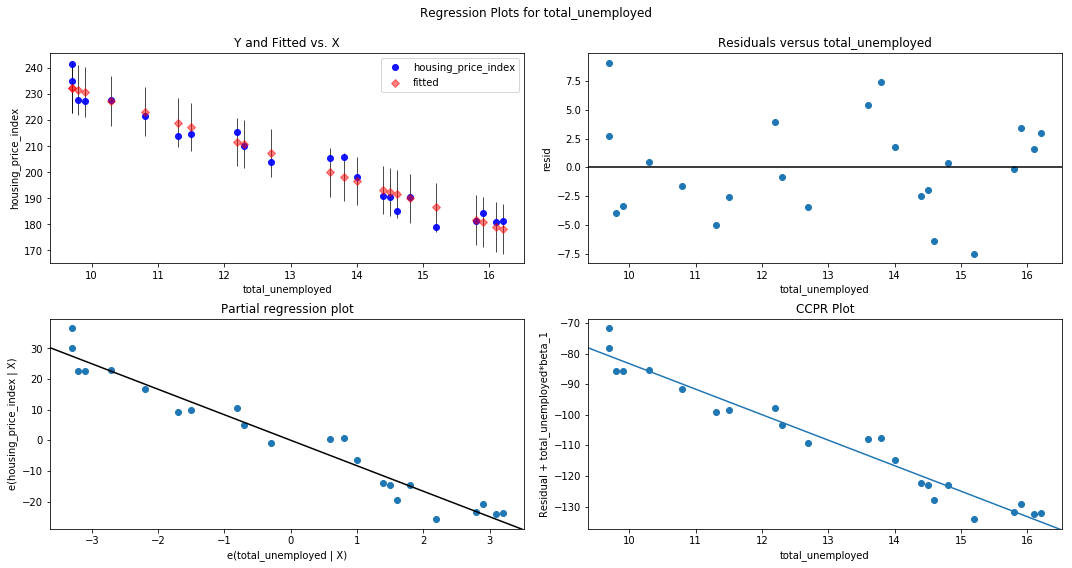

In [13]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(housing_model,'total_unemployed',fig=fig)

# Multiple variable Linear Regression
## Mathematically, multiple linear regression is:
  Y=B<sub>o</sub> + B1X1+B2X2+ ... + BkXk + e

In [14]:
housing_model2 = ols("""housing_price_index ~ total_unemployed
                                            + long_interest_rate
                                            + federal_funds_rate
                                            + consumer_price_index
                                            + gross_domestic_product
                                              """,data=df).fit()

In [15]:
housing_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     housing_price_index   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.974
Method:                  Least Squares   F-statistic:                     168.5
Date:                 Mon, 31 Dec 2018   Prob (F-statistic):           7.32e-14
Time:                         23:18:20   Log-Likelihood:                -55.164
No. Observations:                   23   AIC:                             122.3
Df Residuals:                       17   BIC:                             129.1
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -389.2234    187.252     -2.079      0.053    -784.291       5.844
total_unemployed          -0.1727      2.399     -0.072      0.943      -5.234       4.889
long_interest_rate         5.4326      1.524      3.564      0.002       2.216       8.649
federal_funds_rate        32.3750      9.231      3.507      0.003      12.898      51.852
consumer_price_index       0.7785      0.360      2.164      0.045       0.020       1.537
gross_domestic_product     0.0252      0.010      2.472      0.024       0.004       0.047
==============================================================================
Omnibus:                        1.363   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.506   Jarque-Bera (JB):                1.043
Skew:                          -0.271   Prob(JB):                        0.594
Kurtosis:                       2.109   Cond. No.                     4.58e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# housing_model2.predict()
housing_model2.predict()

array([178.43525177, 182.94740657, 181.09194353, 181.14562428,
       183.32023131, 190.27083372, 187.75194372, 190.83262115,
       192.9396594 , 195.03504713, 201.43198737, 205.49138797,
       205.40901167, 211.63959759, 216.53436991, 217.03711249,
       214.61603361, 220.25356382, 226.35806584, 225.03434165,
       232.39660505, 235.16736014, 238.84000033])

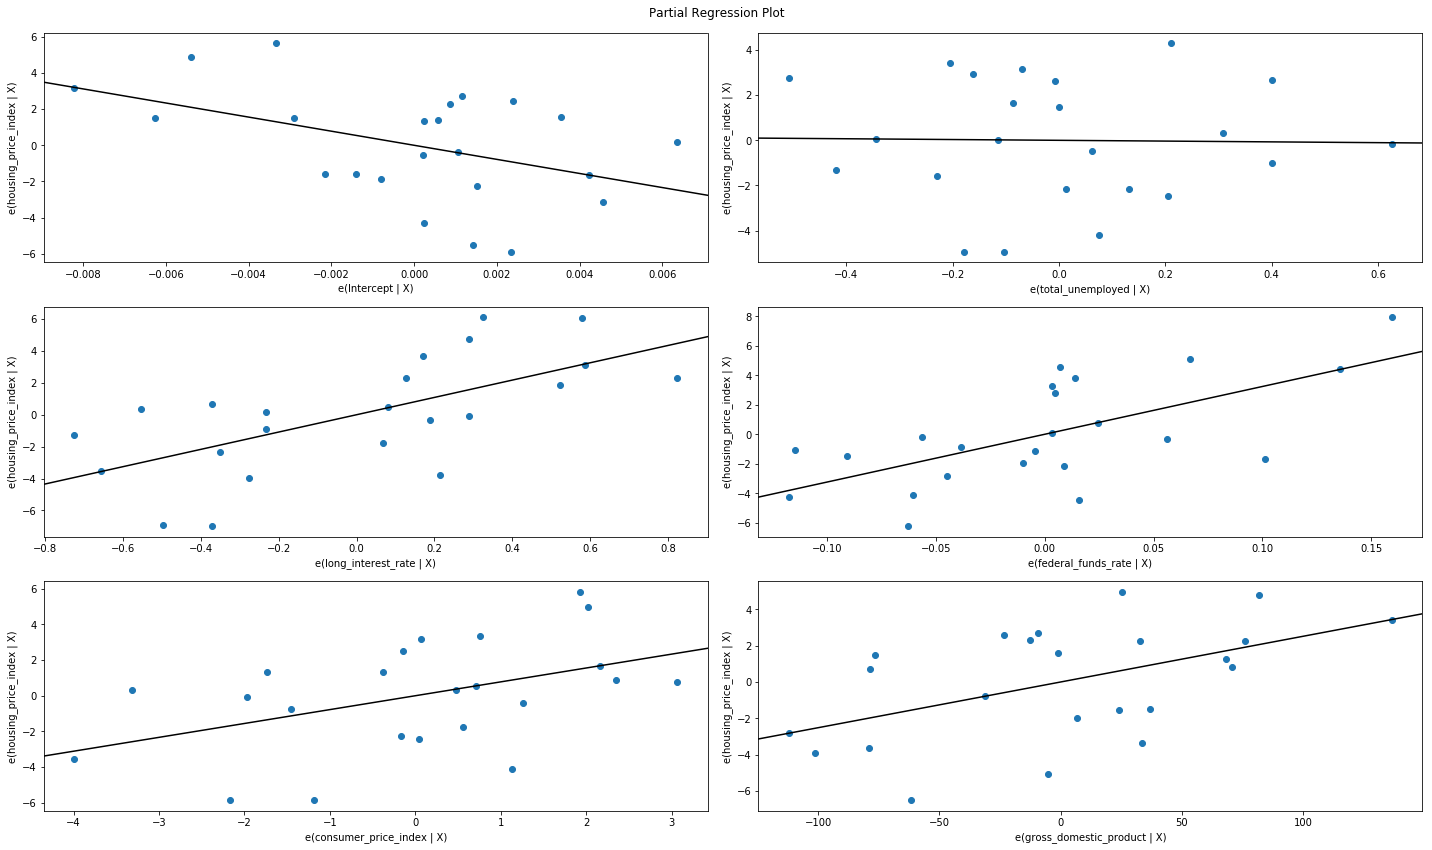

In [17]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model2,fig=fig)